# **PRÀCTICA ÀLGEBRA**
- Biel Fernandez Herencia

- Izan Perez Sanchez

- Edgar Saez Lopez

In [1]:
!pip install kagglehub numpy pandas matplotlib plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------------ --------------------------- 3.1/9.9 MB 20.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.9 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 15.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Realitzem la instal·lació de les llibreries, per tal que el programa s’executi correctament. La majoria d’aquestes no venen instal·lades de fàbrica, així, només cal executar aquest quadre per descarregar-les.

In [2]:
import kagglehub

path = kagglehub.dataset_download("rajmehra03/movielens100k")


100%|█████████████████████████████████████████████████████████████████████████████| 1.69M/1.69M [00:00<00:00, 3.27MB/s]

Extracting files...


Aquí importem tot el dataset del kagglehub. Les dades es guarden en una ruta local que emmagatzemem a la variable "path" per poder accedir-hi posteriorment.

In [3]:
import os
os.listdir(path)

['links.csv', 'movies.csv', 'ratings.csv', 'tags.csv', 'u.data']

Llistem els fitxers descarregats per després crear una estructura de dades on emmagatzarem les dades importants.

In [4]:
import pandas as pd

df = pd.read_csv(path+"/ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Importem pandas, que es la llibreria per gestionar els datasets i guardem la taula dels “ratings” a una variable.
Imprimim les primeres parts de la taula per verificar que tot ha funcionat bé.

In [5]:
df = df.iloc[12000:13000, :3]

df = pd.pivot_table(df, values="rating", index="userId",
                       columns="movieId")

df

movieId,1,2,6,7,10,16,20,21,25,32,...,79132,80463,81054,81591,81786,81834,82459,88125,88129,97673
userId,,,,,,,,,,,,,,,,,,,,,
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,4.0,NaN,3.5,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,3.5,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,...,4.5,NaN,NaN,NaN,NaN,4.5,NaN,4.5,4.0,4.5
79,2.0,2.5,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,2.0,4.0,4.0,3.0,5.0,1.0,4.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,4.0,2.5,4.0,NaN,3.5,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ara redefinim la variable anterior, primer agafem només la part del dataset que hem d’analitzar (del 12000 al 12999) i només agafem les tres primeres columnes de la taula (ja que no necessitem el “timestamp”).
A continuació utilitzem el “pivot table” del pandas per crear la matriu.
Imprimim la matriu resultant per veure que tot ha quedat bé.
Les dimensions de la matriu son 9 x 729 ja que hi ha només 9 usuaris diferents en el rang de 12000 a 12999. Cada fila representa un usuari, i les columnes representen les diferents pel·lícules que han rebut valoracions. Només tenim 729 pel·lícula ja que els 9 usuaris només han valorat 729 pel·lícules. 

In [6]:
df = df.fillna(0)
df

movieId,1,2,6,7,10,16,20,21,25,32,...,79132,80463,81054,81591,81786,81834,82459,88125,88129,97673
userId,,,,,,,,,,,,,,,,,,,,,
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,4.0,0.0,3.5,0.0,3.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,3.5,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,...,4.5,0.0,0.0,0.0,0.0,4.5,0.0,4.5,4.0,4.5
79,2.0,2.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,2.0,4.0,4.0,3.0,5.0,1.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,4.0,2.5,4.0,0.0,3.5,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Per poder treballar amb la matriu canviem els valors que no estan definits per zeros amb la comanda fila(0).

In [7]:
import numpy as np
from numpy.linalg import svd

U, sigma, Vt = svd(df, full_matrices=False)

# construim la matriu diagonal perque la funcion svd el valor sigma es un array amb els valors singulars
Sigma = np.diag(sigma)

# Reconstruim la matriu pero substituint els valors 0 per les prediccions
pred = np.dot(np.dot(U, Sigma), Vt)

pred

array([[ 4.33578736e-16, -5.36292502e-16,  5.12188827e-16, ...,
        -4.73889640e-16, -4.32778591e-16, -4.87767428e-16],
       [ 3.99912370e-16, -7.80056935e-16,  3.04973049e-17, ...,
        -1.04866376e-15, -9.40374633e-16, -1.04519431e-15],
       [ 4.00000000e+00, -3.30198244e-15,  3.50000000e+00, ...,
        -1.59367846e-15, -1.73812049e-15, -1.29874837e-15],
       ...,
       [ 1.07195877e-14, -5.94631038e-15,  9.85151925e-15, ...,
        -7.46534828e-15, -6.72334192e-15, -7.41352342e-15],
       [-4.86975560e-16, -7.81323145e-16,  5.22032583e-15, ...,
        -3.49778174e-16, -3.74218265e-16, -3.49778174e-16],
       [ 3.33066907e-16, -9.57567359e-16,  5.00000000e+00, ...,
        -1.97064587e-15, -1.72778458e-15, -1.87045783e-15]],
      shape=(9, 729))

Importem la llibreria numpy per realitzar la descomposició en valors singulars de la matriu (SVD). Fet això, obtenim les següents estructures producte de la descomposició:
- U: matriu 9x9 que relaciona els usuaris amb els temes
- sigma: vector de valors singulars 
- Vt: matriu 9x729 que relaciona les pel·lícules amb els temes

Posteriorment, construim Sigma, que és la matriu diagonal formada pels valor singulars del vector sigma.

Finalment reconstruïm la matriu pero substituint els valors 0 per les prediccions calculades.

In [8]:
# Rang
rang_matriu_contruida = np.linalg.matrix_rank(pred)
rang_matriu_contruida

np.int64(9)

El rang de la matriu de prediccions es de 9 ja que només tenim 9 usuaris diferents. 


In [186]:
# vector valors singulars
sigma

array([78.28443425, 53.36692855, 50.3734961 , 39.47853474, 23.05393457,
       22.21283523, 18.48505578, 17.14184453, 16.21081143])

COMENTAR

In [187]:
print(U.shape)
print(Sigma.shape)
print(Vt.shape)

(9, 9)
(9, 9)
(9, 729)


COMENTAR

### Redució de dimensionalitat a 2 i mostra el gràfic 2D

L'elaboració del gràfic queda comentada durant l'escriptura del codi

In [9]:
# coger los nombres de las pelis
df_movie_name = pd.read_csv(path+"/movies.csv")
df_movie_name = df_movie_name.iloc[:, :2]

df_movie_name.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [10]:
df.columns

Index([    1,     2,     6,     7,    10,    16,    20,    21,    25,    32,
       ...
       79132, 80463, 81054, 81591, 81786, 81834, 82459, 88125, 88129, 97673],
      dtype='int64', name='movieId', length=729)

In [13]:
# Convertimos el DataFrame de nombres en un diccionario para que sea rápido buscar
# {movieId: titulo}
dict_nombres = dict(zip(df_movie_name['movieId'], df_movie_name['title']))

# Creamos la lista de nombres siguiendo el orden de las columnas de tu matriz df
# Usamos .get() por si algún ID de la matriz no está en el CSV (evita errores)
nombres_para_grafico = [dict_nombres.get(int(col), f"ID Desconocido: {col}") for col in df.columns]



In [14]:
# Reducion de la dimensionalidad
# k es igual al nombre de components al que volem reduir
def reducion_dim(k, U, sigma, Vt):
    U_k = U[:, :k]
    S_k = np.diag(sigma[:k])
    Vt_k = Vt[:k, :]

    usuarios_kd = np.dot(U_k, S_k)
    pelis_kd = np.dot(Vt_k.T, S_k)

    return usuarios_kd, pelis_kd


In [15]:
usuarios_2d, pelis_2d = reducion_dim(2, U, sigma, Vt)

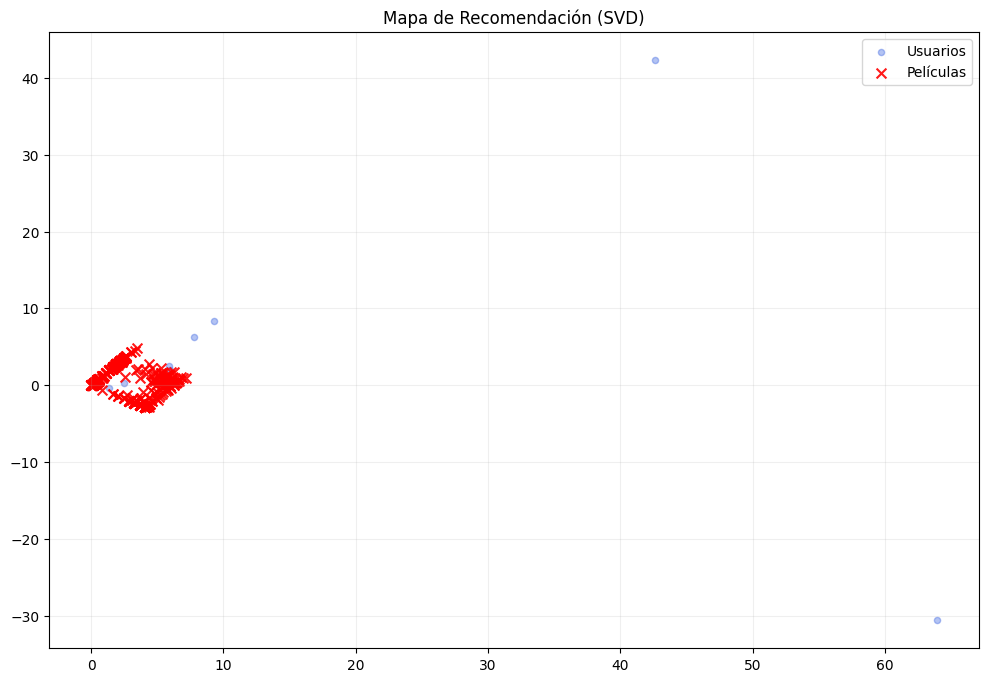

In [16]:
import matplotlib.pyplot as plt

# Asumiendo que:
# u_red son tus usuarios (filas de U reducidas)
# p_red son tus pelis (filas de V o columnas de Vt reducidas)

plt.figure(figsize=(12, 8))

# 1. Pintamos los usuarios
plt.scatter(usuarios_2d[:, 0], usuarios_2d[:, 1], 
            c='royalblue', alpha=0.4, label='Usuarios', s=20)

# 2. Pintamos las películas
plt.scatter(pelis_2d[:, 0], pelis_2d[:, 1], 
            c='red', alpha=0.9, label='Películas', marker='x', s=50)


plt.title("Mapa de Recomendación (SVD)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

COMENTARIO QUE VAMOS A ARREGLAR GRÁFICO PQ SALE MUY JUNTO TODO + MENCIONAR QUE LOS USUARIOS AISLADOS NO APARECERÁN EN EL SIGUIENTE

In [17]:
# 1. Restar la media de cada usuario (centrar datos)
df_centered = df.sub(df.mean(axis=1), axis=0).fillna(0)

# 2. Ahora haz el SVD sobre df_centered
U, sigma, Vt = np.linalg.svd(df_centered, full_matrices=False)

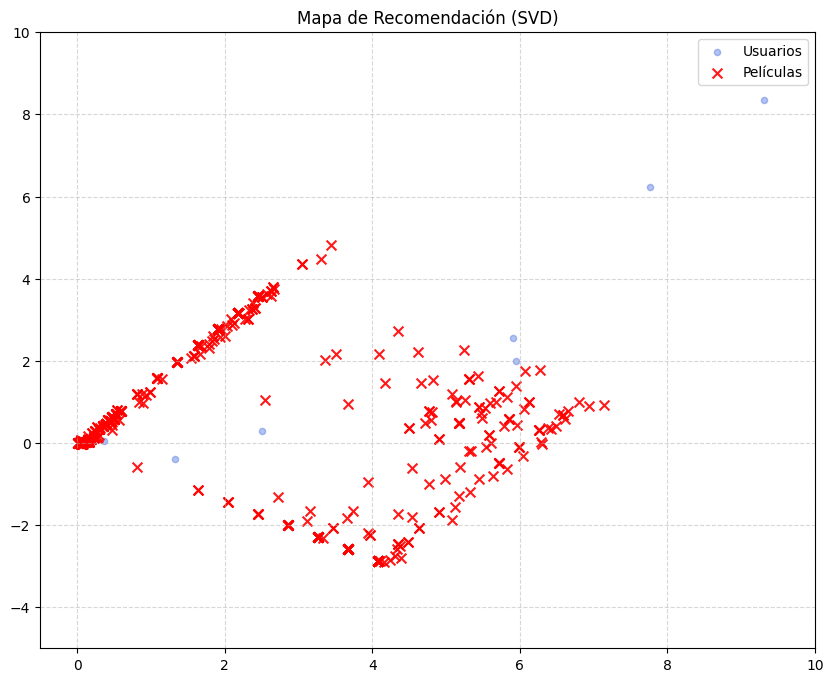

In [19]:
import matplotlib.pyplot as plt

# Asumiendo que:
# u_red son tus usuarios (filas de U reducidas)
# p_red son tus pelis (filas de V o columnas de Vt reducidas)

plt.figure(figsize=(10, 8))

# 1. Pintamos los usuarios
plt.scatter(usuarios_2d[:, 0], usuarios_2d[:, 1], 
            c='royalblue', alpha=0.4, label='Usuarios', s=20)

# 2. Pintamos las películas
plt.scatter(pelis_2d[:, 0], pelis_2d[:, 1], 
            c='red', alpha=0.9, label='Películas', marker='x', s=50)


plt.xlim(-0.5, 10) 
plt.ylim(-5, 10)


plt.title("Mapa de Recomendación (SVD)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

**Anàlisi del gràfic 2D**

El gràfic presenta una projecció en 2D de la base de dades. Mitjançant la reducció de dimensionalitat (SVD), els eixos representen factors latents (com gèneres o estils) que agrupen els elements per afinitat.
- Distribució: Les pel·lícules (roig) es concentren al centre perquè són mitjanes de molts gustos. Els usuaris (blau) estan més dispersos, reflectint perfils més extrems o específics.
- Afinitat: La proximitat o coincidència en el mateix quadrant indica una alta correlació de gustos. La recomanació es basa en la direcció del vector respecte a l'origen.
- Usuaris aïllats: Representen "super-usuaris" amb moltes valoracions o individus amb gustos molt allunyats de la tendència general.


### Redució de dimensionalitat a 3 i mostra de manera interactiva 3D

L'elaboració del gràfic queda comentada durant l'escriptura del codi

In [24]:
import plotly.express as px
import plotly.graph_objects as go

In [25]:
U, sigma, Vt = np.linalg.svd(df, full_matrices=False)

usuarios_3d, pelis_3d = reducion_dim(3, U, sigma, Vt)

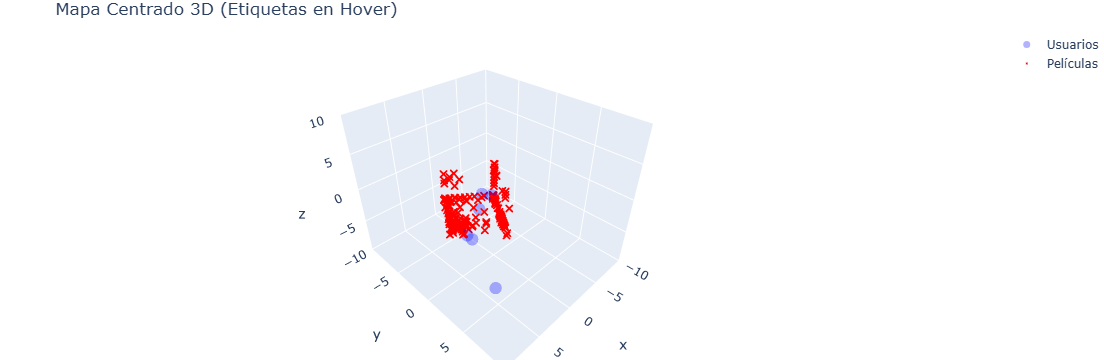

In [55]:
fig = go.Figure()

# Usuarios (Puntos azules)
fig.add_trace(go.Scatter3d(
    x=usuarios_3d[:, 0], y=usuarios_3d[:, 1], z=usuarios_3d[:, 2],
    mode='markers', # Quitamos '+text' de aquí
    marker=dict(size=7, color='blue', opacity=0.3),
    name='Usuarios',
    hovertext=[f"Usuario {i}" for i in range(len(usuarios_3d))], # Info al pasar el ratón
    hoverinfo='text'
))

# Películas (Cruces rojas)
fig.add_trace(go.Scatter3d(
    x=pelis_3d[:, 0], y=pelis_3d[:, 1], z=pelis_3d[:, 2],
    mode='markers', # Solo puntos/cruces, sin texto fijo
    marker=dict(size=2, color='red', symbol='x'),
    name='Películas',
    hovertext=nombres_para_grafico, # Títulos de las pelis solo en el hover
    hoverinfo='text'
))

# Ajuste estético para que el centro sea el 0
fig.update_layout(
    title="Mapa Centrado 3D (Etiquetas en Hover)",
    scene=dict(
        xaxis=dict(range=[-10, 10]), # Ajusta estos números si ves los puntos muy pequeños
        yaxis=dict(range=[-10, 10]),
        zaxis=dict(range=[-10, 10])
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()

**Anàlisi del gràfic 3D**

FER + COM S'UTILITZA


In [57]:
# 1. Usamos TU función para obtener las coordenadas en 2D
usuarios_2d, pelis_2d = reducion_dim(2, U, sigma, Vt)

# 2. Elegimos usuario
idx_usuario = 4
coord_usuario = usuarios_2d[idx_usuario]  # El punto (x,y) del usuario
puntuaciones_reales = df.iloc[idx_usuario].values

# 3. Calculamos DISTANCIAS (Cercanía geométrica)
recomendaciones = []

print(f"Buscando películas cercanas al Usuario {df.index[idx_usuario]}...")

for i in range(len(pelis_2d)):
    # Solo si NO la ha visto (en tu df original los 0 eran NaN/no vistas)
    if puntuaciones_reales[i] == 0:
        coord_peli = pelis_2d[i] # El punto (x,y) de la peli
        
        # Distancia Euclídea (Pitágoras)
        distancia = np.linalg.norm(coord_usuario - coord_peli)
        
        nombre_peli = nombres_para_grafico[i]
        recomendaciones.append((distancia, nombre_peli))

# 4. Ordenamos de MENOR a MAYOR distancia (los que están más cerca)
recomendaciones.sort(key=lambda x: x[0]) 
top_3 = recomendaciones[:3]

print(f"\nUsuario {df.index[idx_usuario]} está en {coord_usuario}")
print("Las 3 películas más cercanas (no vistas) son:")
for dist, nombre in top_3:
    print(f"  - {nombre} (Distancia: {dist:.4f})")

Buscando películas cercanas al Usuario 79...

Usuario 79 está en [5.94785342 1.98931445]
Las 3 películas más cercanas (no vistas) son:
  - Terminator, The (1984) (Distancia: 0.2758)
  - Taxi Driver (1976) (Distancia: 0.6279)
  - Monty Python and the Holy Grail (1975) (Distancia: 0.7501)


Així, recomanem les 3 películes que es troben més a prop de l'usuari k (que no hagi vist encara) utilitzant la matriu de prediccions

COMENTAR 4 Y 7 CERCA
